In [37]:
import ROOT
from scipy.optimize import curve_fit
import scipy.stats as stats

import numpy as np
import os
from matplotlib import pyplot as plt


In [2]:
# create some fake data with arrors which are almost quadratic
data = ROOT.TGraphErrors()
for i in range(100):
    data.SetPoint(i, i, i**2+ROOT.gRandom.Gaus(0, 0.1*i))
    data.SetPointError(i, 0.1, 0.1+ROOT.gRandom.Gaus(0, 0.01))



# create a linear fit
fit = ROOT.TF1("fit", "[0] + [1]*x + [2]*x*x", 0, 100)
# fit.SetParameters(0,
data.Fit(fit, "S M")
data.SetMarkerStyle(20)
data.SetMarkerColor(ROOT.kBlue)
data.SetMarkerSize(0.5)


 FCN=26.9076 FROM HESSE     STATUS=OK             16 CALLS         369 TOTAL
                     EDM=4.5013e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.33497e-02   8.72926e-02   4.29297e-05  -1.10157e-02
   2  p1           1.47754e-02   4.25809e-02   1.03811e-05  -2.91333e-03
   3  p2           9.99412e-01   7.24130e-04   2.38278e-07   4.31204e-01


Info in <TCanvas::Print>: png file fit.png has been created
/bin/sh: cmsrel: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `BASH_FUNC_cmsrel'
/bin/sh: cmsenv: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `BASH_FUNC_cmsenv'


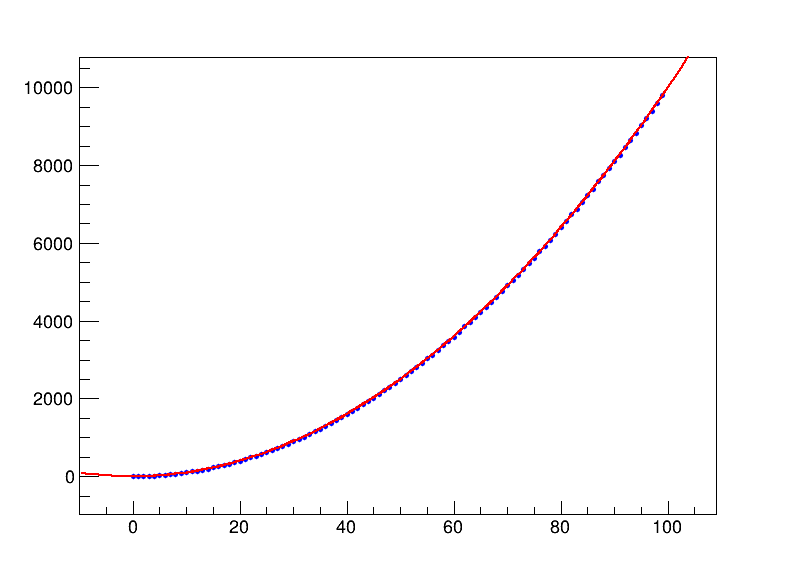

In [3]:
# create a canvas

canvas = ROOT.TCanvas("canvas", "canvas", 800, 600)
data.Draw("AP")
fit.Draw("SAME")
canvas.Update()

canvas.Draw()

canvas.SaveAs("fit.png")

# open the image and display it
img = Image.open("fit.png")
img.show()


In [4]:
# delete the canvas
del canvas
#delete the image
# os.remove("fit.png")

In [62]:
# data from fit_results_inverse_median_Response_inclusive_eta0.261to0.348.json
num=0
data_dict= {
               "x": np.array([
            37.23144592575506,
            42.040583953178654,
            50.01707665030007,
            63.4612267414981,
            79.86174026412183,
            103.42430610251425,
            133.90952982964532,
            173.35657590868786,
            246.22720694134972,
            348.46066005241914,
            472.37029662893,
            646.8079201401259,
            871.8057625018096,
            1243.993277950927,
            1753.3345674891973,
            2255.1242504451097,
            2752.934025817911,
            3250.0338208639787,
            3745.5866479256774,
            4241.077067085816,
            4734.744405708133
        ][num:]),
        "y": np.array([
            1.0062264150943396,
            1.0072399899269706,
            1.0077475434618293,
            1.005720392255469,
            1.003701380175659,
            1.001188986232791,
            0.9991881089183112,
            0.9971952131637997,
            0.9957057505601196,
            0.9937267080745342,
            0.9942207307979121,
            0.9957057505601196,
            0.9962017434620175,
            0.9957057505601196,
            0.995210251306295,
            0.9957057505601196,
            0.9971952131637997,
            0.9981906663339157,
            0.9996875781054737,
            1.001188986232791,
            1.002192432974192
        ][num:]),
        "yerr": np.array([
            0.0016681835934499877,
            0.001749221838889041,
            0.0012096922485527132,
            0.0012009039302765879,
            0.001130349359048437,
            0.0009074623953655307,
            0.0009129324374953333,
            0.0008117229975907797,
            0.0005930529886136327,
            0.0005756303576146156,
            0.0005125838051048275,
            0.000494375917191455,
            0.00044451830639313686,
            0.0003177458423049373,
            0.00027813092756587423,
            0.0002778412264377272,
            0.0002929858756535543,
            0.0002865447587640248,
            0.0002848361376943025,
            0.00029217861213729016,
            0.00029758200435398376
        ][num:]),}

In [6]:
# create a graph from the dictionary
graph = ROOT.TGraphErrors(len(data_dict["x"]))
for i in range(len(data_dict["x"])):
    graph.SetPoint(i, data_dict["x"][i], data_dict["y"][i])
    graph.SetPointError(i, 0, data_dict["yerr"][i]/1)



****************************************
         Invalid FitResult  (status = 4 )
****************************************
Minimizer is Minuit / Migrad
Chi2                      =      5.24336
NDf                       =            9
Edm                       =    0.0676113
NCalls                    =         2316
p0                        =      1.06337   +/-   0.0215448   
p1                        =      18.6064   +/-   0.0677881   
p2                        =      18.6569   +/-   0.177163    
p3                        =     -1.03117   +/-   0.0192714   
p4                        =    0.0313758   +/-   0.00119842  
p5                        =    -0.224978   +/-   0.0464858   
p6                        =   0.00454503   +/-   0.00048348  
p7                        =      13.7642   +/-   3.47477     
p8                        =      2.91684   +/-   0.0182403   

 FCN=5.24336 FROM MIGRAD    STATUS=CALL LIMIT   2315 CALLS        2316 TOTAL
                     EDM=0.0676113    STRATEGY

Warning in <Fit>: Abnormal termination of minimization.
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file fit.png has been created


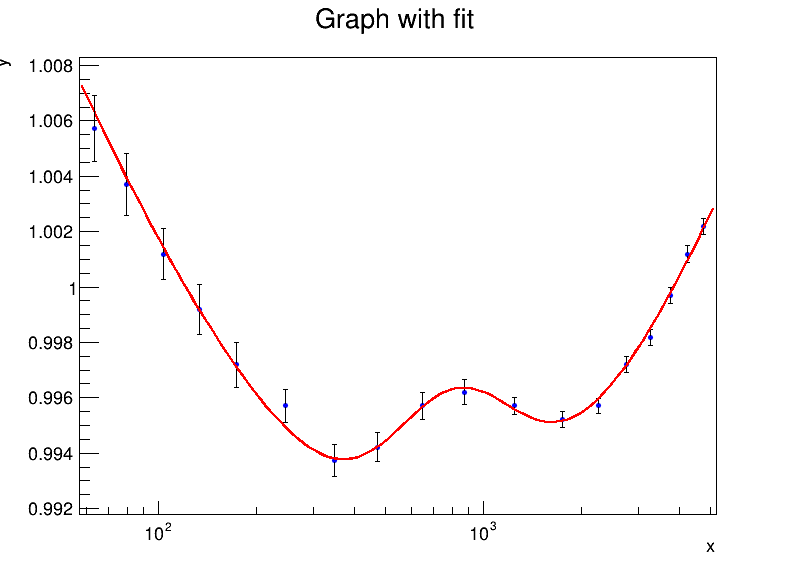

In [12]:
func_string = "[0] + [1] / (TMath::Log10(x) * TMath::Log10(x) + [2]) + [3] * TMath::Exp(-[4] * (TMath::Log10(x) - [5]) * (TMath::Log10(x) - [5])) + [6] * TMath::Exp(-[7] * (TMath::Log10(x) - [8]) * (TMath::Log10(x) - [8]))"
func_root = ROOT.TF1("func_root", func_string, data_dict["x"][0], data_dict["x"][-1])
# func_root.SetParameters(
#             1.6081836786569568,
#             22.58516985573203,
#             35.96303104113097,
#             -1.2096680332552872,
#             0.012402902153327011,
#             3,
#             -4.876292773828425,
#             23.88044583275305,
#             3.5067093288482084
# )

func_root.SetParameters( # good one
            0.9296082409013535,
            18.206614170229148,
            18.423866780448805,
            -0.9111338528208499,
            0.03662551034929148,
            -0.3825746665434431,
            0.0005, 0.15, 3
)
# func_root.SetParameter(0,-0.0221278)
# func_root.SetParameter(1,119.265)
# func_root.SetParameter(2,100)
# func_root.SetParameter(3,-0.0679365)
# func_root.SetParameter(4,2.82597)
# func_root.SetParameter(5,1.8277)
# func_root.SetParameter(6,-0.0679365)
# func_root.SetParameter(7,3.82597)
# func_root.SetParameter(8,1.8277)

# func_root.SetParLimits(6,-20,10)
# func_root.SetParLimits(7,0,100)
# func_root.SetParLimits(3,-15,15)
# func_root.SetParLimits(4,0,500)
# func_root.SetParLimits(0,-2,25)
# func_root.SetParLimits(1,0,250)


# func_root.SetParameters(
#             0.9296082409013535,
#             18.206614170229148,
#             18.423866780448805,
#             -1.03117,
#             0.031,
#             -0.225,
#             0.0045, 13.7, 2.9
# )
# func_root.FixParameter(0, 0.9296)
# func_root.FixParameter(1, 18.206614170229148)
# func_root.FixParameter(2,   18.423866780448805)

# func_root.FixParameter(3, 0)
# func_root.FixParameter(4, 0)
# func_root.FixParameter(5, 0)

# func_root.SetParameters(
#     0.3667496167,
#     16.67700125,
#     11.18420626,
#     -0.3423179398,
#     0.5418982445,
#     1.710901214,
#     -0.460721112,
#     0.7631271986,
#     0.4373914876,
# )


fit_info = str(graph.Fit("func_root", "S"))
# draw the graph
# del canvas
canvas = ROOT.TCanvas("canvas", "canvas", 800, 600)
graph.SetMarkerStyle(20)
graph.SetMarkerColor(ROOT.kBlue)
graph.SetMarkerSize(0.5)
graph.SetTitle("Graph with fit")
graph.GetXaxis().SetTitle("x")
graph.GetYaxis().SetTitle("y")
# set log x
ROOT.gPad.SetLogx()
graph.Draw("AP")
func_root.Draw("SAME")
canvas.Update()
canvas.Draw()
canvas.SaveAs("fit.png")
print(fit_info)

In [10]:
func_string2 = "[2]*([3]*([4]+TMath::Log(max([0],min([1],x)))*([5]+TMath::Log(max([0],min([1],x)))*[6])+[7]/x))*1./([8]+[9]/x+[10]*log(x)/x+[11]*(pow(x/[12],[13])-1)/(pow(x/[12],[13])+1)+[14]*pow(x,-0.3051)+[15]*x)"
func2 = ROOT.TF1("func2", func_string2, 10, 4500)
# func2.SetParameters(
#     [30,
#     70,
#     0.995827,
#     1.000000,
#     0.430200,
#     0.314141,
#     -0.000254,
#     -4.185680,
#     1.0170,
#     1.3459,
#     0.25291,
#     0.05041,
#     196.01,
#     0.9754,
#     -0.07417,
#     -0.00003170,]
# )

func2.SetParameter(0, 30)
func2.SetParameter(1, 70)
func2.SetParameter(2, 0.995827)
func2.SetParameter(3, 1.000000)
func2.SetParameter(4, 0.430200)
func2.SetParameter(5, 0.314141)
func2.SetParameter(6, -0.000254)
func2.SetParameter(7, -4.185680)
func2.SetParameter(8, 1.0170)
func2.SetParameter(9, 1.3459)
func2.SetParameter(10, 0.25291)
func2.SetParameter(11, 0.05041)
func2.SetParameter(12, 196.01)
func2.SetParameter(13, 0.9754)
func2.SetParameter(14, -0.07417)
func2.SetParameter(15, -0.00003170)


SyntaxError: invalid syntax (1968802724.py, line 23)

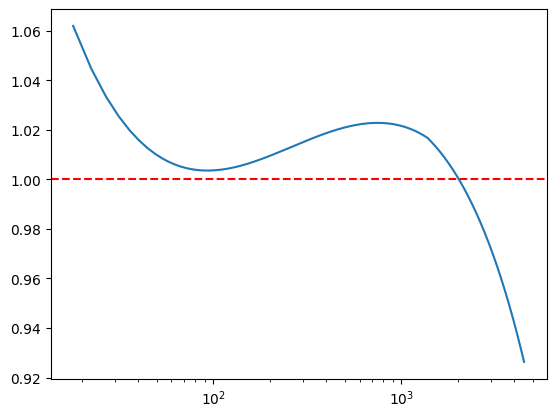

In [ ]:
def func2_py(x, p):
    return 1/(
        p[2]
        * (
            p[3]
            * (
                p[4]
                + np.log(np.minimum(p[1], x))
                * (p[5] + np.log(np.minimum(p[1], x)) * p[6])
                + p[7] / x
            )
        )
        * 1.0
        / (
            p[8]
            + p[9] / x
            + p[10] * np.log(x) / x
            + p[11] * (pow(x / p[12], p[13]) - 1) / (pow(x / p[12], p[13]) + 1)
            + p[14] * pow(x, -0.3051)
            + p[15] * x
        )
    )


params = [
30  , 1380   ,0.995827, 1.000000, 0.951355, 0.021658, -0.002214, 0.117335,   1.0170, 1.3459, 0.25291, 0.05041, 196.01, 0.9754, -0.07417, -0.00003170]

# draw the function in a matplotlib plot
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(18, 4500, 1000)

plt.plot(x, func2_py(x, params), label="function")
# x log scale
plt.xscale("log")
#plot line at 1
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

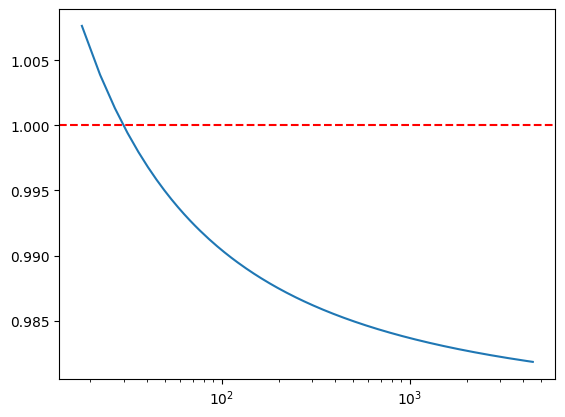

In [ ]:
# define the function to fit with 9 parameters
def std_gaus(x, p0, p1, p2, p3, p4, p5, p6, p7, p8):
    return (
        p0
        + p1 / (np.log10(x) ** 2 + p2)
        + p3 * np.exp(-p4 * (np.log10(x) - p5) ** 2)
        + p6 * np.exp(-p7 * (np.log10(x) - p8) ** 2)
    )
p_initial = [
            0.97,
            10,
            +0.5,
            -0.5,
            0.5,
            2.5,
            0,0,0
]
p_initial = [
            0.9711944049901806525,
            0.05100162783645151,
            0.15438656997478406,
            0.006970788303348081,
            0.0010614731369840119,
            0.02236118077173509,
            0,0,0
]

# draw
x = np.linspace(18, 4500, 1000)
plt.plot(x, std_gaus(x, *p_initial), label="function")
# x log scale
plt.xscale("log")
#plot line at 1
plt.axhline(y=1, color='r', linestyle='--')
plt.show()


# Fit with curve fit

popt:  [ 1.48955698e+01 -4.17500622e+01  5.26910129e+01 -3.61708194e+01
  1.45885298e+01 -3.45992730e+00  4.47284790e-01 -2.43419172e-02]
perr:  [6.05241201e+00 1.69761097e+01 2.01193061e+01 1.30662911e+01
 5.02460893e+00 1.14472904e+00 1.43146043e-01 7.58368970e-03]
chi2/ndf: 10.32464465553721/13
p_value: 0.6671958974807216


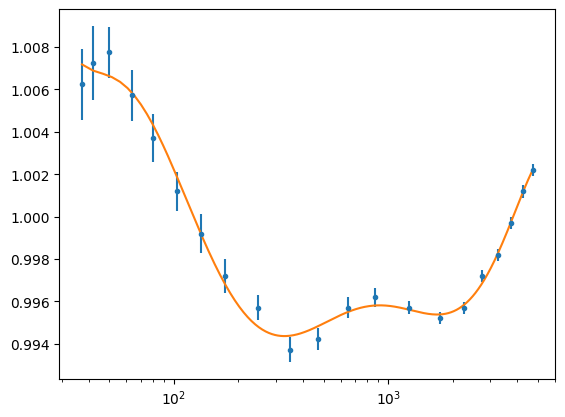

In [77]:
def std_gaus(x, p0, p1, p2, p3, p4, p5, p6, p7, p8):
    return (
        p0
        + p1 / (np.log10(x) ** 2 + p2)
        + p3 * np.exp(-p4 * (np.log10(x) - p5) ** 2)
        + p6 * np.exp(-p7 * (np.log10(x) - p8) ** 2)
    )
# def std_gaus(x, p0, p1, p2, p3, p4, p5):
#     x=np.array(x)
#     return (
#         p0
#         + p1 / (np.log10(x) ** 2 + p2)
#         + p3 * np.exp(-p4 * (np.log10(x) - p5) ** 2)
#     )
def pol(x, p0, p1, p2,p3, p4, p5,p6, p7):
    return (
        p0
        + p1 * np.log10(x)
        + p2 * np.log10(x)**2
        + p3 * np.log10(x)**3
        + p4 * np.log10(x)**4
        + p5 * np.log10(x)**5
        + p6 * np.log10(x)**6
        + p7 * np.log10(x)**7
        # + p8 * np.log10(x)**8
    )
# def pol(x, p0, p1, p2, p3, p4):
#     return (
#         p0
#         + p1 * x
#         + p2 * x**2
#         + p3 * x**3
#         + p4 * x**4

#     )



if False:
    p_initial = [
    1.06337,18.6064,18.6569,-1.03117,0.0313758,-0.224978,0.00454503,13.7642,2.91684
    ]
    popt, pcov = curve_fit(
        std_gaus,
        data_dict["x"],
        data_dict["y"],
        sigma=data_dict["yerr"],
        p0=p_initial,
        absolute_sigma=True,
        maxfev=10000,
    )
    print("popt: ", popt)
    # print(pcov)

    #get parameter errors
    perr = np.sqrt(np.diag(pcov))
    print("perr: ", perr)

    # compute chi2
    chi2 = np.sum(
        ((data_dict["y"] - std_gaus(data_dict["x"], *popt)) / data_dict["yerr"]) ** 2
    )
    p_value = 1 - stats.chi2.cdf(chi2, len(data_dict["x"]) - len(popt))
    print(f"chi2/ndf: {chi2}/{len(data_dict['x']) - len(popt)}")
    print(f"p_value: {p_value}")

# popt = [
# 1.06337,18.6064,18.6569,-1.03117,0.0313758,-0.224978,0.00454503,13.7642,2.91684
# ]
# popt = [
# 0.3727025053   ,   16.54883483   ,   11.29006865 ,   -0.3583255249  ,   0.5231249981   ,   1.646863871  ,  -0.4211619519  ,   0.8560383065 ,    0.4436561066
# ]

if True:
    p_initial = [
    1,1,1,1,1,1,1,1
    ]
    popt, pcov = curve_fit(
        pol,
        data_dict["x"],
        data_dict["y"],
        sigma=data_dict["yerr"],
        p0=p_initial,
        absolute_sigma=True,
        maxfev=10000,
    )
    print("popt: ", popt)
    # print(pcov)

    #get parameter errors
    perr = np.sqrt(np.diag(pcov))
    print("perr: ", perr)

    # compute chi2
    chi2 = np.sum(
        ((data_dict["y"] - pol(data_dict["x"], *popt)) / data_dict["yerr"]) ** 2
    )
    p_value = 1 - stats.chi2.cdf(chi2, len(data_dict["x"]) - len(popt))
    print(f"chi2/ndf: {chi2}/{len(data_dict['x']) - len(popt)}")
    print(f"p_value: {p_value}")

x_fit = np.linspace(data_dict["x"][0], data_dict["x"][-1], 1000)
y_fit = pol(x_fit, *popt)

fig, ax = plt.subplots()
ax.errorbar(
    data_dict["x"], data_dict["y"], yerr=data_dict["yerr"], fmt=".", label="data"
)
ax.plot(x_fit, y_fit, label="fit")
#log x scale
ax.set_xscale("log")


****************************************
Minimizer is Minuit / Migrad
Chi2                      =      447.543
NDf                       =           11
Edm                       =  5.56862e-08
NCalls                    =          566
p0                        =     -41.1586   +/-   0.350011    
p1                        =      93.4864   +/-   0.594592    
p2                        =     -76.3172   +/-   0.321922    
p3                        =       23.778   +/-   0.0294323   
p4                        =       1.5498   +/-   0.021491    
p5                        =     -2.26992   +/-   0.00108354  
p6                        =   -0.0155482   +/-   0.00181737  
p7                        =     0.250221   +/-   0.000103433 
p8                        =    -0.059461   +/-   0.000174374 
p9                        =   0.00441106   +/-   2.12668e-05 

popt_root:  [-41.15860696298332, 93.48644544192892, -76.31721171609607, 23.778043876774234, 1.549804560404346, -2.2699249050674095, -0.015548180

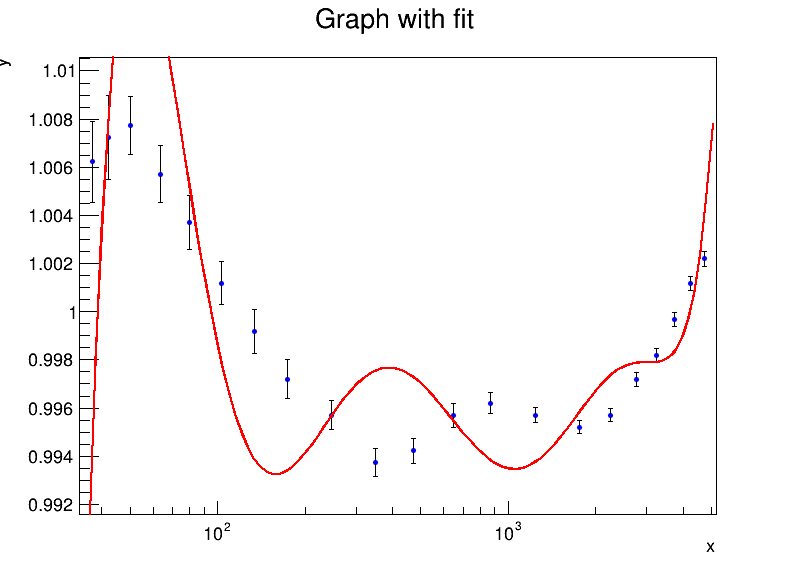

In [85]:
# redo the polynomial fit with ROOT
pol_string = "[0] + [1]* TMath::Log10(x) + [2]* pow(TMath::Log10(x),2) + [3]* pow(TMath::Log10(x),3) + [4]* pow(TMath::Log10(x),4) + [5]* pow(TMath::Log10(x),5) + [6]* pow(TMath::Log10(x),6) + [7]* pow(TMath::Log10(x),7) + [8]* pow(TMath::Log10(x),8) + [9]* pow(TMath::Log10(x),9)"
pol_root = ROOT.TF1("pol_root", pol_string, data_dict["x"][0], data_dict["x"][-1])

pol_root.SetParameters(1,1,1,1,1,1,1,1,1,1)
graph = ROOT.TGraphErrors(len(data_dict["x"]))
for i in range(len(data_dict["x"])):
    graph.SetPoint(i, data_dict["x"][i], data_dict["y"][i])
    graph.SetPointError(i, 0, data_dict["yerr"][i])

fit_info = str(graph.Fit("pol_root", "S"))
print(fit_info)
# get the parameters
popt_root = [pol_root.GetParameter(i) for i in range(pol_root.GetNpar())]
print("popt_root: ", popt_root)
# get the errors
perr_root = [pol_root.GetParError(i) for i in range(pol_root.GetNpar())]
print("perr_root: ", perr_root)

# compute chi2
chi2 = 0
for i in range(len(data_dict["x"])):
    chi2 += (data_dict["y"][i] - pol_root.Eval(data_dict["x"][i])) ** 2 / data_dict["yerr"][i] ** 2
p_value = 1 - stats.chi2.cdf(chi2, len(data_dict["x"]) - len(popt_root))

print(f"chi2/ndf: {chi2}/{len(data_dict['x']) - len(popt_root)}")
print(f"p_value: {p_value}")

# redo the polynomial fit with ROOT

# draw the graph
del canvas
canvas = ROOT.TCanvas("canvas", "canvas", 800, 600)
graph.SetMarkerStyle(20)
graph.SetMarkerColor(ROOT.kBlue)

graph.SetMarkerSize(0.5)
graph.SetTitle("Graph with fit")
graph.GetXaxis().SetTitle("x")
graph.GetYaxis().SetTitle("y")
# set log x
ROOT.gPad.SetLogx()
graph.Draw("AP")
pol_root.Draw("SAME")
canvas.Update()

canvas.Draw()
